In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

___Chapter 6: Problem 8___

In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

(a) Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector of length n = 100.

In [2]:
np.random.seed(42)
x   = np.random.normal(0,1,100)
eps = np.random.normal(0,1,100)

print("Predictor X Values =")
print(x)

print()

print("Noise Vector Values =")
print(eps)

Predictor X Values =
[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21

(b) Generate a response vector Y of length n = 100 according to the model Y = B0+ B1X + B2X2 + B3X3 + E, where 0, 1, 2, and 3 are constants of your choice.

In [3]:
y = 2 + 2*x + 3*(x**2) + 2.5*(x**3) + eps

print("Response Vector Y =")
print(y)

Response Vector Y =
[  2.62461185   1.35356912   4.89042796  20.03476835   1.50279566
   2.06814875  24.37239977   6.6062788    1.72113255   4.29307377
  -0.450143     1.44019237   2.75520663  -5.89097617  -5.5467212
   1.6810318    0.41963316   1.83365168   1.92861567  -1.1313277
  20.03770514   0.76321243   3.55230073  -3.39189245   1.98382627
   4.4526242   -1.1302159    2.74111881   1.43894819   1.10634549
  -0.21254509  31.95353545   0.91124221   0.75613618   6.14669985
   1.03058058   1.78812457  -9.53481799  -0.40818041   1.29819427
   6.34716705   3.75056205   0.19747692   1.78616904  -2.21930286
   1.96414709   0.23398084   9.09966482   3.66482929  -5.60435483
   3.29884873   1.87839068   0.56534772   5.15019339  10.28372974
   7.76926455   2.82257463   2.06833379   1.89130811   9.78374594
   0.48073817   2.5031756    1.23253524  -1.19952561   7.91009265
  16.88004777   2.69266278  11.45168406   2.98846323   0.53334878
   2.34309893  20.4527132    1.85498177  22.39081715 -27.3

(e) Now fit a lasso model to the simulated data, again using X,X2,...,X10 as predictors. Use cross-validation to select the optimal value of. Create plots of the cross-validation error as a function
 of. Report the resulting coefficient estimates, and discuss the results obtained.

C:\Users\kruti\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+02, tolerance: 4.336e-01
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\kruti\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.370e+02, tolerance: 4.336e-01
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\kruti\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or c

Optimal lambda (alpha): 0.002915


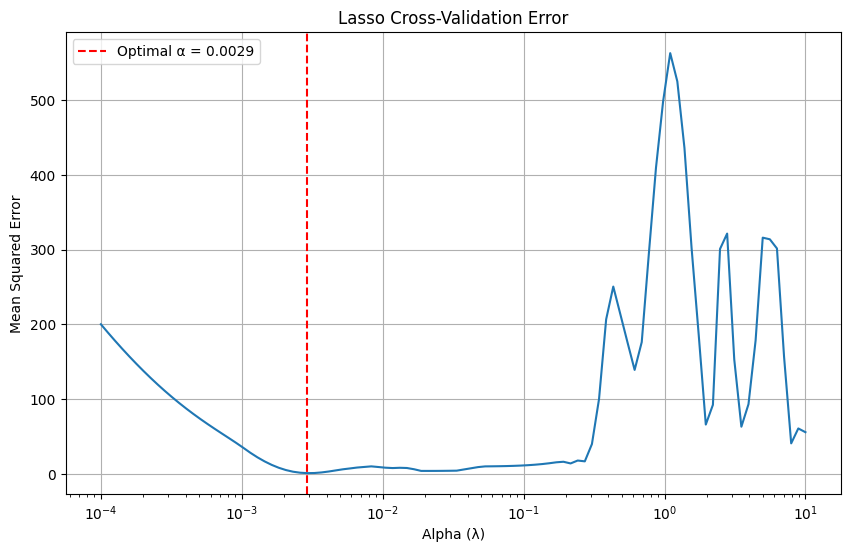


Coefficient estimates:
Intercept: 1.8331
X^1: 1.7734
X^2: 3.2521
X^3: 2.8425
X^4: -0.0291
X^5: -0.1205
X^6: 0.0055
X^7: -0.0009
X^8: -0.0003
X^9: 0.0016
X^10: -0.0001


In [4]:
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(x.reshape(-1, 1))

alphas = np.logspace(-4, 1, 100)
lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=42)
lasso_cv.fit(X_poly, y)

optimal_alpha = lasso_cv.alpha_
print(f"Optimal lambda (alpha): {optimal_alpha:.6f}")

# Plot
plt.figure(figsize=(10, 6))
plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1))
plt.axvline(optimal_alpha, color='r', linestyle='--', label=f'Optimal α = {optimal_alpha:.4f}')
plt.xlabel('Alpha (λ)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Cross-Validation Error')
plt.legend()
plt.grid(True)
plt.show()

print("\nCoefficient estimates:")
print(f"Intercept: {lasso_cv.intercept_:.4f}")
for i, coef in enumerate(lasso_cv.coef_, 1):
    print(f"X^{i}: {coef:.4f}")

(f) Now generate a response vector Y according to the model Y = B0 + B7X7 + E, and perform forward stepwise selection and the lasso. Discuss the results obtained.

New response vector Y with β₀=2, β₇=1.5

Step 1: Added X^7, MSE = 0.8933
Step 2: Added X^2, MSE = 0.8419
Step 3: Added X^9, MSE = 0.8188
Step 4: Added X^5, MSE = 0.8154
Step 5: Added X^3, MSE = 0.8120
Step 6: Added X^4, MSE = 0.8095
Step 7: Added X^8, MSE = 0.7982
Step 8: Added X^6, MSE = 0.7889
Step 9: Added X^10, MSE = 0.7836
Step 10: Added X^1, MSE = 0.7776

Final Forward Stepwise Coefficients:
Intercept: 1.8694
X^7: 2.3639
X^2: -0.8594
X^9: -0.1181
X^5: -2.0902
X^3: 1.9152
X^4: 3.0148
X^8: 0.7335
X^6: -2.4130
X^10: -0.0764
X^1: -0.5529
Optimal lambda (alpha): 0.002477

Lasso Coefficient estimates:
Intercept: 2.0334
X^1: 1.5331
X^2: -1.0155
X^3: -4.9463
X^4: 1.0609
X^5: 3.6596
X^6: -0.1984
X^7: 0.5929
X^8: -0.0098
X^9: 0.0613


C:\Users\kruti\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.790e+03, tolerance: 1.686e+02
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\kruti\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+03, tolerance: 1.686e+02
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\kruti\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or c

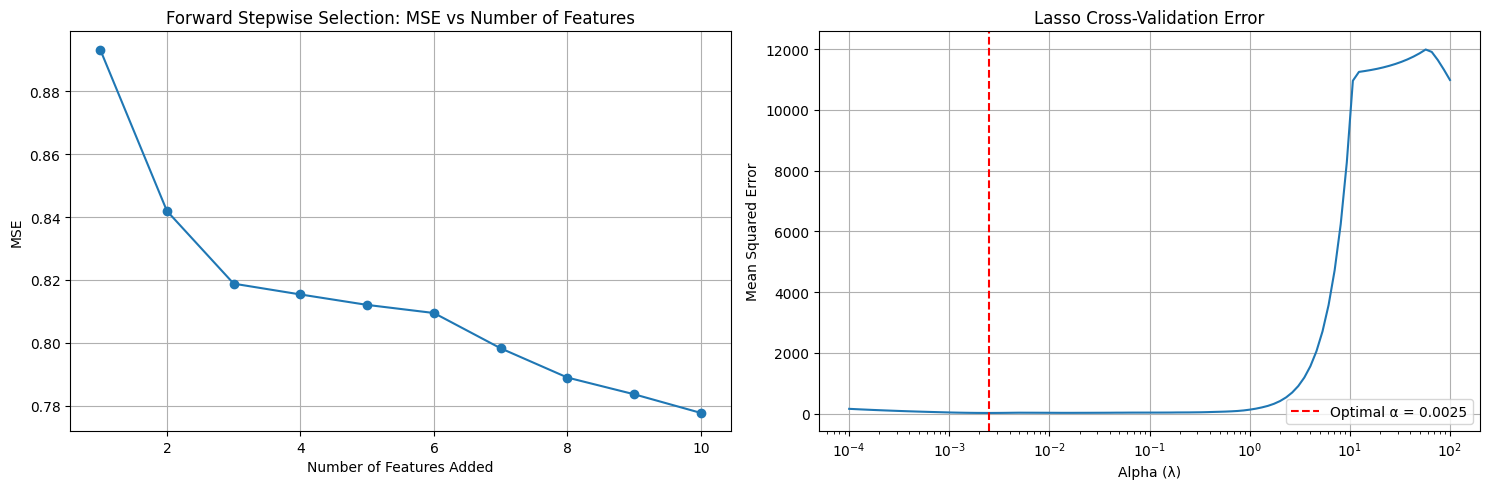


Forward Stepwise: First feature selected was X^7
Lasso: Non-zero coefficients identify important features


In [5]:
y_new = 2 + 1.5*(x**7) + eps

print("New response vector Y with β₀=2, β₇=1.5")
print()

# Create polynomial features X, X^2, ..., X^10
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(x.reshape(-1, 1))

# FORWARD STEPWISE SELECTION

def forward_stepwise_selection(X, y, max_features=10):
    """Perform forward stepwise selection"""
    n_features = X.shape[1]
    selected_features = []
    remaining_features = list(range(n_features))
    
    mse_history = []
    
    for step in range(max_features):
        best_mse = float('inf')
        best_feature = None
        
        # Try adding each remaining feature
        for feature in remaining_features:
            test_features = selected_features + [feature]
            X_subset = X[:, test_features]
            
            # Fit model and calculate MSE
            model = LinearRegression()
            model.fit(X_subset, y)
            y_pred = model.predict(X_subset)
            mse = mean_squared_error(y, y_pred)
            
            if mse < best_mse:
                best_mse = mse
                best_feature = feature
        
        # Add the best feature
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        mse_history.append(best_mse)
        
        print(f"Step {step+1}: Added X^{best_feature+1}, MSE = {best_mse:.4f}")
    
    return selected_features, mse_history

selected_features, mse_history = forward_stepwise_selection(X_poly, y_new, max_features=10)

# Fit final model
X_selected = X_poly[:, selected_features]
final_model = LinearRegression()
final_model.fit(X_selected, y_new)

print("\nFinal Forward Stepwise Coefficients:")
print(f"Intercept: {final_model.intercept_:.4f}")
for idx, feature_idx in enumerate(selected_features):
    print(f"X^{feature_idx+1}: {final_model.coef_[idx]:.4f}")

# Fit Lasso with cross-validation
alphas = np.logspace(-4, 2, 100)
lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=42)
lasso_cv.fit(X_poly, y_new)

optimal_alpha = lasso_cv.alpha_
print(f"Optimal lambda (alpha): {optimal_alpha:.6f}")

print("\nLasso Coefficient estimates:")
print(f"Intercept: {lasso_cv.intercept_:.4f}")
for i, coef in enumerate(lasso_cv.coef_, 1):
    if abs(coef) > 0.001:  # Only print non-zero coefficients
        print(f"X^{i}: {coef:.4f}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Forward Stepwise MSE
axes[0].plot(range(1, 11), mse_history, marker='o')
axes[0].set_xlabel('Number of Features Added')
axes[0].set_ylabel('MSE')
axes[0].set_title('Forward Stepwise Selection: MSE vs Number of Features')
axes[0].grid(True)

# Plot 2: Lasso CV Error
axes[1].semilogx(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1))
axes[1].axvline(optimal_alpha, color='r', linestyle='--', 
                label=f'Optimal α = {optimal_alpha:.4f}')
axes[1].set_xlabel('Alpha (λ)')
axes[1].set_ylabel('Mean Squared Error')
axes[1].set_title('Lasso Cross-Validation Error')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"\nForward Stepwise: First feature selected was X^{selected_features[0]+1}")
print(f"Lasso: Non-zero coefficients identify important features")